Writing Tests in Python
============
Why write tests?
- Check that your code is working
- Add new features fearlessly without breaking old ones 
- Think strategically about desired outcomes 


"A significant advantage of TDD is that it enables you to take small steps when writing software." - [Agile Data](http://agiledata.org/essays/tdd.html)

## What is a test?

A **unit test** is a test that tests a *unit* of code, for example a function or method.
This is different than an integration test or an end-to-end test, which both work to test a service provided by a deployed program, or an entire user experience provided by a suite of individual programs.


Unit:
- a small part of an application typically a function or method


Testing:
- run unit for some input to verify its output

## What is Test Driven Development (TDD)?
Test-driven development [(TDD)](https://technologyconversations.com/2013/12/20/test-driven-development-tdd-example-walkthrough/) is a software development process that relies on the repetition of a very short development cycle: first the developer writes an (initially failing) automated test case that defines a desired improvement or new function, then produces the minimum amount of code to pass that test, and finally refactors the new code to acceptable standards.

The following sequence of steps is generally followed:

- Add a test
- Run all tests and see if the new one fails
- Write some code
- Run tests
- Refactor code
- Repeat


## Where does TDD fit in the Data Science Process?
Data Science can be split into two phases: **Exploratory**, and **Production**.

Tests are more for the production phase, when you're trying out features that will actually make it into your product. 
Reading material on pushing your DS model to production ASAP: http://engineering.pivotal.io/post/api-first-for-data-science/ .<br>
That certainly doesn't mean you can't or shouldn't use tests in the exploratory phase to check that functions are working properly! You should! It just becomes more vital in the production stage.

#### Some other good advice around testing (from [here](http://engineering.pivotal.io/post/test-driven-development-for-data-science/)):
1. Start TDD once you have a fair idea of what model and features will go in production.
2. Don’t test drive everything! Figure out the core functionalities of your code. For example while feature generation, if a feature is generated using simple count functionality of SQL, trust that SQL’s in-build count functionality is already well tested. Writing another test around that won’t add much value.
3. Test those bits of pipeline where data is involved. *The work product of a data science use case is data.*

## Building Blocks of Good Test Writing


When writing any test, it is good to ask yourself: What is the desired outcome of the test, and the function/class it is testing?

### The Assert Statement:
- Goal: verify that the value your code produced is equal to the expected value.
- Typically, a strict equality is used
    - `assert Result == Expected`

When you run an assert statement in python, one of 2 things will happen:
1. Nothing
2. An [AssertionError](https://docs.python.org/2/reference/simple_stmts.html#assert)

**WARNING!** Assert statements are only as good as the person writing them! Passing tests do *not* prove that something is right! But, if a test fails, then we KNOW something is wrong.

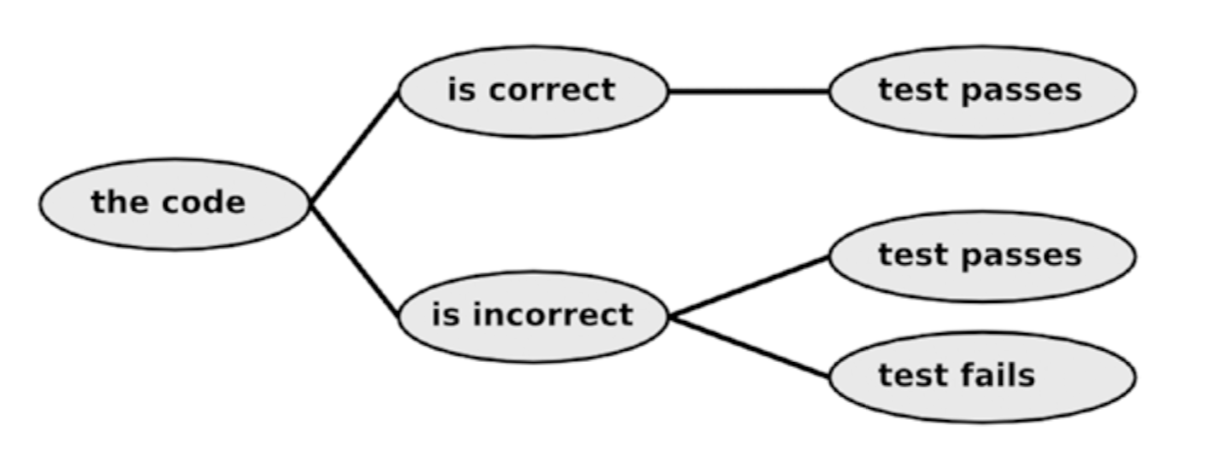

Source: Python Best Practices [book](https://www.amazon.com/Pro-Python-Best-Practices-Maintenance/dp/1484222407)

### Example: Poor Assert Statement

In [18]:
import pandas as pd
import numpy as np

In [19]:
def add_1(x):
    return x + 1

assert  add_1(1) == 3
    


AssertionError: 

## Improving the Assertion Error

The AssertionError we got there isn't very helpful.


We can improve the output we get from the assert statement.

In [21]:
assert add_1(1) == 3, "Adder wrong! Check arithmetic in function and test."

AssertionError: Adder wrong! Check arithmetic in function and test.

Automated Tests
===========
You can write tests in python that run automatically.
[pytest](https://docs.pytest.org/en/latest/) is an extremely useful python package for automated testing.

Here, we will be using [ipytest](https://github.com/chmp/ipytest), which allows pytest to run in jupyter notebooks.


In [141]:
!pip install ipytest

boto3 1.5.33 has requirement botocore<1.9.0,>=1.8.47, but you'll have botocore 1.10.19 which is incompatible.
bacnet-controller 0.0.1 has requirement boto3==1.5.12, but you'll have boto3 1.5.33 which is incompatible.
bacnet-controller 0.0.1 has requirement pytz==2018.3, but you'll have pytz 2017.2 which is incompatible.
You are using pip version 10.0.0, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
import ipytest.magics
import pytest
# set the file name (required)
__file__ = '0.1 Introduction to Tests and Test Driven Development.ipynb'

In [17]:
%%run_pytest 

def test_tester():
    assert 42 == 42

============================= test session starts ==============================
platform darwin -- Python 3.6.3, pytest-3.2.1, py-1.4.34, pluggy-0.4.0
rootdir: /Users/rachelberryman/Documents/DSR_Model_Pipelines_Course, inifile:
collected 1 item

0.1 Introduction to Tests and Test Driven Development.py .

=========================== 1 passed in 0.03 seconds ===========================


## Writing Tests: Example with Data

In [109]:
from sklearn.datasets import load_boston

In [110]:
boston_x, boston_y = load_boston(return_X_y=True)

We can use tests to quickly check our data.

In [111]:
# checking that features and target have same number of records.
assert boston_x.shape[0] == len(boston_y)

In [112]:
# checking to see if NaNs exist in the data
assert np.any(np.isnan(boston_x)) == False
assert np.any(np.isnan(boston_y)) == False

## Exercise: Using TDD, write a simple regression model to predict the housing prices. 

Start with a test of what the outcome should look like.

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
x_train, x_test, y_train, y_test = train_test_split(boston_x, boston_y, test_size=.3)

**Double click to see the solution**

<div class='spoiler'>

%%run_pytest

def test_predictions():
    
    # checking for data leakage
    assert len(predictions) == len(y_test)
    
    # Sanity checks for our algorithm.
    # Our train score should be higher than the test score.
    # both scores should be under 100.
    assert train_score > test_score
    assert np.all([train_score, test_score]) < 100
 

from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)
predictions = reg.predict(x_test)

train_score = reg.score(x_train, y_train)
test_score = reg.score(x_test, y_test)

</div>

A quick plot of our predictions vs. actuals.

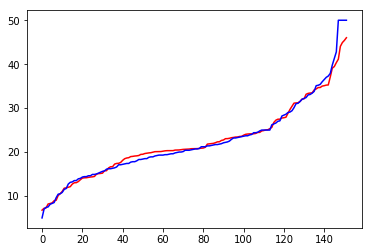

In [157]:
y_test.sort()
predictions.sort()
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(predictions, 'r', y_test, 'b');

Sources:
- http://python.kaihola.fi/static/unit-testing-scipy-applications.pdf
